<a href="https://colab.research.google.com/github/Ruthalasridivy/Data-science-task-4/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CSV file saved as 'enhanced_accident_dataset.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Accident_ID        50 non-null     int64 
 1   Date               50 non-null     object
 2   Location           50 non-null     object
 3   Severity           50 non-null     object
 4   Vehicles_Involved  50 non-null     int64 
 5   Casualties         50 non-null     int64 
 6   Weather            50 non-null     object
 7   Time_of_Day        50 non-null     object
 8   Road_Type          50 non-null     object
 9   Traffic_Signal     50 non-null     object
 10  Driver_Age_Group   50 non-null     object
dtypes: int64(3), object(8)
memory usage: 4.4+ KB


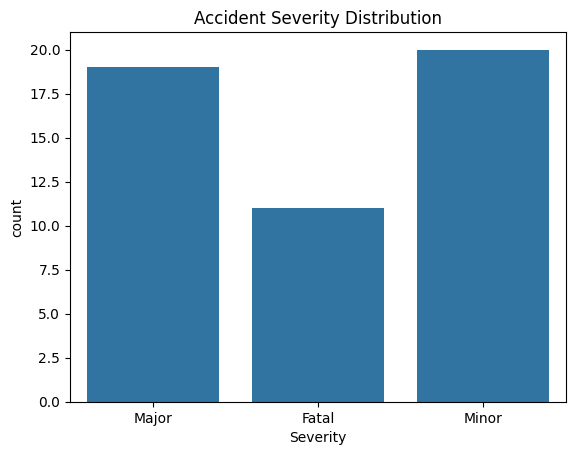

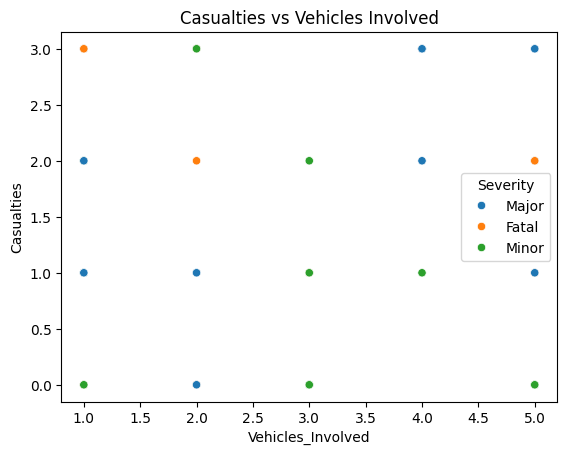

Accuracy: 1.0


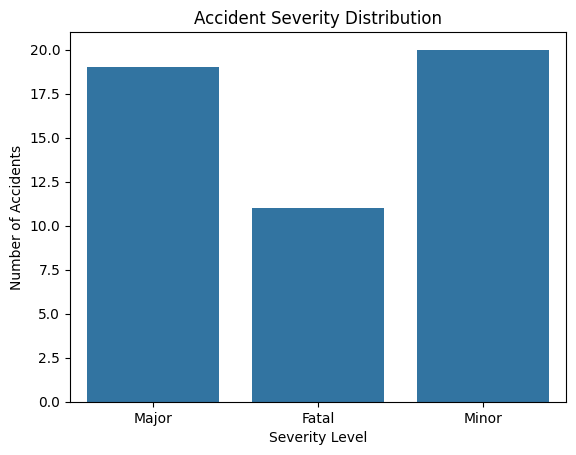

Weather
Foggy     1.666667
Cloudy    1.333333
Stormy    1.300000
Rainy     1.250000
Clear     1.181818
Name: Casualties, dtype: float64


In [1]:
import pandas as pd
import random
from datetime import datetime, timedelta

num_records = 50
start_date = datetime(2025, 1, 1)

locations = ["Delhi", "Mumbai", "Chennai", "Kolkata", "Hyderabad", "Bangalore", "Pune", "Ahmedabad", "Jaipur", "Lucknow"]
severities = ["Minor", "Major", "Fatal"]
weather_conditions = ["Clear", "Rainy", "Foggy", "Stormy", "Cloudy"]
time_of_day = ["Morning", "Afternoon", "Evening", "Night"]
road_types = ["Highway", "City Road", "Rural Road", "Residential"]
traffic_signal = ["Yes", "No"]
driver_age_group = ["<18", "18-25", "26-40", "41-60", "60+"]

data = {
    "Accident_ID": [1000 + i for i in range(num_records)],
    "Date": [(start_date + timedelta(days=i)).strftime("%Y-%m-%d") for i in range(num_records)],
    "Location": random.choices(locations, k=num_records),
    "Severity": random.choices(severities, k=num_records),
    "Vehicles_Involved": [random.randint(1, 5) for _ in range(num_records)],
    "Casualties": [random.randint(0, 3) for _ in range(num_records)],
    "Weather": random.choices(weather_conditions, k=num_records),
    "Time_of_Day": random.choices(time_of_day, k=num_records),
    "Road_Type": random.choices(road_types, k=num_records),
    "Traffic_Signal": random.choices(traffic_signal, k=num_records),
    "Driver_Age_Group": random.choices(driver_age_group, k=num_records)
}

df = pd.DataFrame(data)

df.head()
df.to_csv("enhanced_accident_dataset.csv", index=False)
print("CSV file saved as 'enhanced_accident_dataset.csv'")
from google.colab import files
files.download("enhanced_accident_dataset.csv")
import pandas as pd

# Load the CSV file
df = pd.read_csv("enhanced_accident_dataset.csv")

# Preview the data
df.head()
df.info()
df.describe(include='all')
df.isnull().sum()
df['Date'] = pd.to_datetime(df['Date'])


df_encoded = pd.get_dummies(df, drop_first=True)


import matplotlib.pyplot as plt
import seaborn as sns

# Severity distribution
sns.countplot(x='Severity', data=df)
plt.title("Accident Severity Distribution")
plt.show()

# Casualties vs. Vehicles involved
sns.scatterplot(x='Vehicles_Involved', y='Casualties', hue='Severity', data=df)
plt.title("Casualties vs Vehicles Involved")
plt.show()
df.groupby(['Location', 'Severity']).size().unstack().fillna(0)
df.groupby('Weather')['Casualties'].mean()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Example: Predict Severity
# Drop one of the severity columns from features (X) to avoid multicollinearity
X = df_encoded.drop(['Severity_Minor', 'Accident_ID', 'Date'], axis=1)  # Adjust target column
y = df_encoded['Severity_Major'] # Select 'Severity_Major' as the target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Severity', data=df)
plt.title("Accident Severity Distribution")
plt.xlabel("Severity Level")
plt.ylabel("Number of Accidents")
plt.show()
casualties_by_weather = df.groupby('Weather')['Casualties'].mean().sort_values(ascending=False)
print(casualties_by_weather)